In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
dt_reg = pd.read_csv("Data_set/house_data.csv")
dt_cls = pd.read_csv("Data_set/Social_Network_Ads.csv")

In [3]:
dt_reg.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Location,Price
0,1340,3,1.00,3,1955,Bangalore,221900.0
1,1690,3,2.25,3,1951,Bangalore,538000.0
2,2720,2,1.00,3,1933,Bangalore,180000.0
3,1360,4,3.00,5,1965,Bangalore,604000.0
4,1800,3,2.00,3,1987,Bangalore,510000.0


In [4]:
# There is one mistake in above dataset ie "No_Of_Bathrooms" should not be in float value.
# So let correct it 
dt_reg["No_Of_Bathrooms"] = dt_reg["No_Of_Bathrooms"].apply(np.ceil)
dt_reg.head(2)

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Location,Price
0,1340,3,1.0,3,1955,Bangalore,221900.0
1,1690,3,3.0,3,1951,Bangalore,538000.0


In the above dataset Price is our traget column. so it is comes under Regression Problem. Here we solve it by KNN, Decision Tree, Random Forest.

In [5]:
dt_cls.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In the above dataset "Purchased" is our target column.And it is in the form of 0 and 1 so it comes under binary classification Problem.

In [6]:
dt_cls.Purchased.value_counts()
print("Female=" , 257/400*100)

Female= 64.25


In [7]:
display (dt_reg.isna().sum())
display(dt_cls.isna().sum())

Living_Space(sqft)          0
No_Of_Bedrooms              0
No_Of_Bathrooms             0
Condition(on scale of 5)    0
Year_Build                  0
Location                    0
Price                       0
dtype: int64

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# just for safe purpose 
dt_cls=dt_cls.dropna()
dt_reg=dt_reg.dropna()

In [9]:
display(dt_cls.shape)
display(dt_reg.shape)

(400, 5)

(1199, 7)

## First work on Co-relation technique

Before done corelation, we have set the object string in integer.

In [10]:
dt_reg.Location.value_counts()

Patna        274
Kolkata      232
Chennai      230
lucknow      205
New Delhi    173
Mumbai        63
Bangalore     22
Name: Location, dtype: int64

In [11]:
#  Here is just Analysis 
patna = 274/1199*100
print("patna =",patna)
Bangalore = 22/1199*100
print("Bangalore =",Bangalore)
# So if target column is majorly depends on Column "Location" than we ignore Bangalore because is only 1.8 percent. 
# and all the Bangalore is consider as outlier. It not much effect on my conclusion.
# Less contribute
# when my model is ready for taking decision so it more biased towards Patna.

patna = 22.85237698081735
Bangalore = 1.834862385321101


In [12]:
# for dt_cls
cls_dummy = pd.get_dummies(dt_cls.Gender)
merge_cls = pd.concat([dt_cls , cls_dummy] , axis = "columns") # axis=1 is same.
merge_cls = merge_cls.drop(["Gender"] , axis =1)
display(merge_cls.shape)
display(merge_cls.head()) 

(400, 6)

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [13]:
# for dt_reg
reg_dummy = pd.get_dummies(dt_reg.Location)
merge_reg = pd.concat([dt_reg , reg_dummy],axis=1)
merge_reg = merge_reg.drop(["Location" , "lucknow"] , axis=1)
display(merge_reg.shape)
display(merge_reg.head())

(1199, 12)

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Price,Bangalore,Chennai,Kolkata,Mumbai,New Delhi,Patna
0,1340,3,1.0,3,1955,221900.0,1,0,0,0,0,0
1,1690,3,3.0,3,1951,538000.0,1,0,0,0,0,0
2,2720,2,1.0,3,1933,180000.0,1,0,0,0,0,0
3,1360,4,3.0,5,1965,604000.0,1,0,0,0,0,0
4,1800,3,2.0,3,1987,510000.0,1,0,0,0,0,0


<AxesSubplot:>

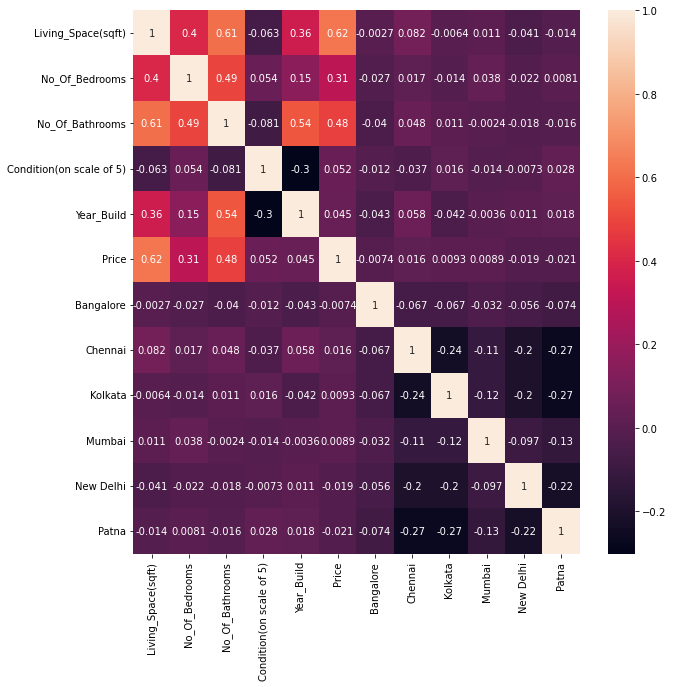

In [14]:
corr_reg =  merge_reg.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_reg , annot = True)

<AxesSubplot:>

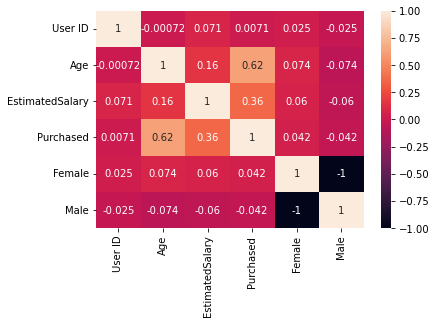

In [15]:
corr_cls =  merge_cls.corr()
sns.heatmap(corr_cls , annot = True)

In [55]:
#  for regression 
x_r = merge_reg.drop(['Price'] , axis=1) 
y_r = merge_reg["Price"]
display(type(x_r))
display(type(y_r))

pandas.core.frame.DataFrame

pandas.core.series.Series

In [17]:
#  for classification
x_c = merge_cls.drop(['Purchased'] , axis=1)
y_c = merge_cls.Purchased 

In [18]:
from sklearn.model_selection import train_test_split
x_c_train , x_c_test, y_c_train ,y_c_test  = train_test_split(x_c,y_c,train_size = 3/4)
x_r_train , x_r_test, y_r_train ,y_r_test  = train_test_split(x_r,y_r,train_size = 3/4)

In [19]:
display(x_r_train.shape)
display(x_r_test.shape)

(899, 11)

(300, 11)

In [20]:
display(x_c_train.shape)
display(x_c_test.shape)

(300, 5)

(100, 5)

## All Regression 

### 1. DecisionTreeRegressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_r_train, y_r_train)

DecisionTreeRegressor()

In [22]:
y_pred = dtr.predict(x_r_test)
display(y_pred)
display(y_r_test)

array([1040000.,  790000., 1000000.,  210000.,  328000.,  625000.,
        851000.,  328000.,  437500.,  478500.,  950000.,  660000.,
        507000.,  478500.,  400000.,  414900.,  226500.,  360000.,
        361000.,  640000.,  347500., 1750000.,  560000.,  269000.,
        675000.,  986000.,  520000., 1390000.,  410000.,  563000.,
        980000.,  240500.,  240500.,  291850.,  650000., 2400000.,
        427200.,  636000.,  252500.,  300000.,  910000.,  532500.,
        379000.,  416000.,  237000.,  790000.,  497000.,  325000.,
        856600.,  453500.,  250000.,  240500.,  937000.,  615000.,
        220000.,  970000.,  199000.,  260000.,  300000.,  538000.,
        349500.,  370000.,  240000.,  900000.,  274700.,  424975.,
        791500.,  438000.,  640000.,  550700.,  363000.,  322500.,
        450000.,  180000., 1750000.,  449950.,  729500.,  130000.,
        687500.,  325000.,  905000.,  460000.,  238000.,  240000.,
       2380000.,  166950.,  245000.,  361000.,  151000.,  7950

42      861990.0
746     650000.0
694     690000.0
909     435000.0
1162    435000.0
          ...   
785     218000.0
370     280000.0
665     331000.0
170     284000.0
22      285000.0
Name: Price, Length: 300, dtype: float64

In [23]:
#  Now check the accuracy 
dtr.score(x_r_test,y_r_test) # Very poor prediction

0.35092731786926323

In [24]:
dtr.score(x_r_train , y_r_train) # 99 percent means it read properly but not able give predict properly

0.9990307933822015

### 2. RandamForestRegressor


In [25]:
from sklearn.ensemble import RandomForestRegressor
Rfr = RandomForestRegressor()
Rfr.fit(x_r_train , y_r_train)      

RandomForestRegressor()

In [26]:
y_Rfr_pred = Rfr.predict(x_r_test)
display(y_Rfr_pred)
display(y_r_test)

array([ 893978.        ,  632493.76      ,  807427.        ,
        496250.24      ,  542349.5       ,  394623.5       ,
        766647.        ,  646291.98      ,  538801.65      ,
        406604.44      ,  875885.75      ,  694960.        ,
        580270.        ,  409978.99      ,  396908.5       ,
        385570.        ,  302730.        ,  359163.65666667,
        281711.        ,  710525.8       ,  363802.88      ,
       1538014.        ,  376517.5       ,  529653.83333333,
       1000299.5       ,  831958.5       ,  623820.49      ,
       1656925.        ,  410420.6       ,  463200.78      ,
       1020840.        ,  334648.5       ,  317120.        ,
        295862.5       ,  643530.        , 1061499.5       ,
        255472.52      ,  558788.        ,  481796.43      ,
        321201.        ,  768201.5       ,  586649.31      ,
        324678.85      ,  438605.26      ,  362478.8       ,
        816760.        ,  506157.81      ,  326532.33333333,
        703472.        ,

42      861990.0
746     650000.0
694     690000.0
909     435000.0
1162    435000.0
          ...   
785     218000.0
370     280000.0
665     331000.0
170     284000.0
22      285000.0
Name: Price, Length: 300, dtype: float64

In [27]:
Rfr.score(x_r_test , y_r_test)

0.5921278690455457

In [28]:
Rfr.score(x_r_train , y_r_train)

0.9181677112946652

  ### 2. KNeighborsResgressor

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 11 , metric ="minkowski")
knn.fit(x_r_train,y_r_train)

KNeighborsRegressor(n_neighbors=11)

In [30]:
y_knn_pred = knn.predict(x_r_test)
display(y_knn_pred)
display(y_r_test)                                                                                                               

array([ 941954.54545455,  533418.18181818,  727709.09090909,
        561538.63636364,  374677.27272727,  375772.72727273,
        741918.18181818,  433863.63636364,  529393.90909091,
        435222.72727273, 1251536.36363636,  543409.09090909,
        718409.09090909,  435222.72727273,  427968.18181818,
        414359.09090909,  378318.18181818,  285200.        ,
        330700.        ,  620545.45454545,  373450.        ,
        917270.45454545,  387772.72727273,  536836.36363636,
        971452.27272727,  735959.09090909,  618413.63636364,
       1320500.        ,  311534.        ,  422557.36363636,
       1235809.09090909,  660318.18181818,  317968.18181818,
        303440.90909091,  560311.27272727,  925088.63636364,
        302100.        ,  650727.27272727,  380540.90909091,
        415318.18181818,  402340.90909091,  531190.90909091,
        280145.45454545,  431680.72727273,  322104.81818182,
        759454.54545455,  545240.90909091,  316686.36363636,
        732054.54545455,

42      861990.0
746     650000.0
694     690000.0
909     435000.0
1162    435000.0
          ...   
785     218000.0
370     280000.0
665     331000.0
170     284000.0
22      285000.0
Name: Price, Length: 300, dtype: float64

In [31]:
knn.score(x_r_test,y_r_test)

0.4572792986625015

In [32]:
knn.score(x_r_train,y_r_train)

0.48181388226596844

# All Classification

### 1. Decision Tree Classifier

In [33]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_c_train, y_c_train)

DecisionTreeClassifier()

In [34]:
y_dtc_pred = dtc.predict(x_c_test)
display(y_dtc_pred)
display(y_c_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

196    0
284    0
331    1
9      0
61     0
      ..
279    1
102    0
227    1
111    0
25     1
Name: Purchased, Length: 100, dtype: int64

In [35]:
dtc.score(x_c_test,y_c_test)*100

86.0

In [36]:
dtc.score(x_c_train,y_c_train)*100

100.0

In [37]:
from sklearn.metrics import confusion_matrix
cmd_dtc=confusion_matrix(y_c_test,y_dtc_pred)

In [38]:
cmd_dtc

array([[52,  7],
       [ 7, 34]], dtype=int64)

In [39]:
cmd_dtc_value = (60+23) / (60+8+9+23)*100
cmd_dtc_value

83.0

### 2. Random Forest Classifier

In [53]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_c_train,y_c_train)

RandomForestClassifier()

In [41]:
y_pred_rfc = rfc.predict(x_c_test)

In [42]:
#  confusion matrix 
cmd_rfc = confusion_matrix(y_c_test , y_pred_rfc)
cmd_rfc

array([[49, 10],
       [ 2, 39]], dtype=int64)

In [57]:
cmd_rfc_value = (59+30)/(59+9+2+30)*100
cmd_rfc_value

89.0

In [58]:
display(rfc.score(x_c_test , y_c_test)*100)
display(rfc.score(x_c_train, y_c_train)*100)

88.0

100.0

### 3. KNN classifier

In [45]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
Knn_c = KNeighborsClassifier() 
Knn_c.fit(x_c_train , y_c_train)

KNeighborsClassifier()

In [46]:
Knn_c_pred = Knn_c.predict(x_c_test)

In [47]:
cmd_knn = confusion_matrix(y_c_test , Knn_c_pred)
cmd_knn

array([[49, 10],
       [19, 22]], dtype=int64)

In [48]:
cmd_knn_value = (58+19)/(23+58+19)*100
cmd_knn_value

77.0

##  Campare 

In [49]:
print(cmd_dtc_value)
print(cmd_rfc_value)
print(cmd_knn_value)

83.0
89.0
77.0


so here best model is Random forest value